## Лабораторна робота №2.



Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.

Під час виконання вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.






Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою [titanic.csv](https://gist.github.com/michhar/2dfd2de0d4f8727f873422c5d959fff5).  
Цей датасет ви вже використовували в лабораторній роботі №1 ;)  
  
  ```NB:побудовані графіки та гістограми мають бути змістовними і візуально зрозумілими.``` 
  
  
  

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
dataset = pd.read_csv('titanic.csv')

**Задача 1:** Який відсоток виживання серед чоловіків / жінок? 

In [2]:
survival_rate = dataset.groupby('Sex')['Survived'].mean() * 100
print(survival_rate)

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64


**Задача 2:** Відтворіть ці графіки  
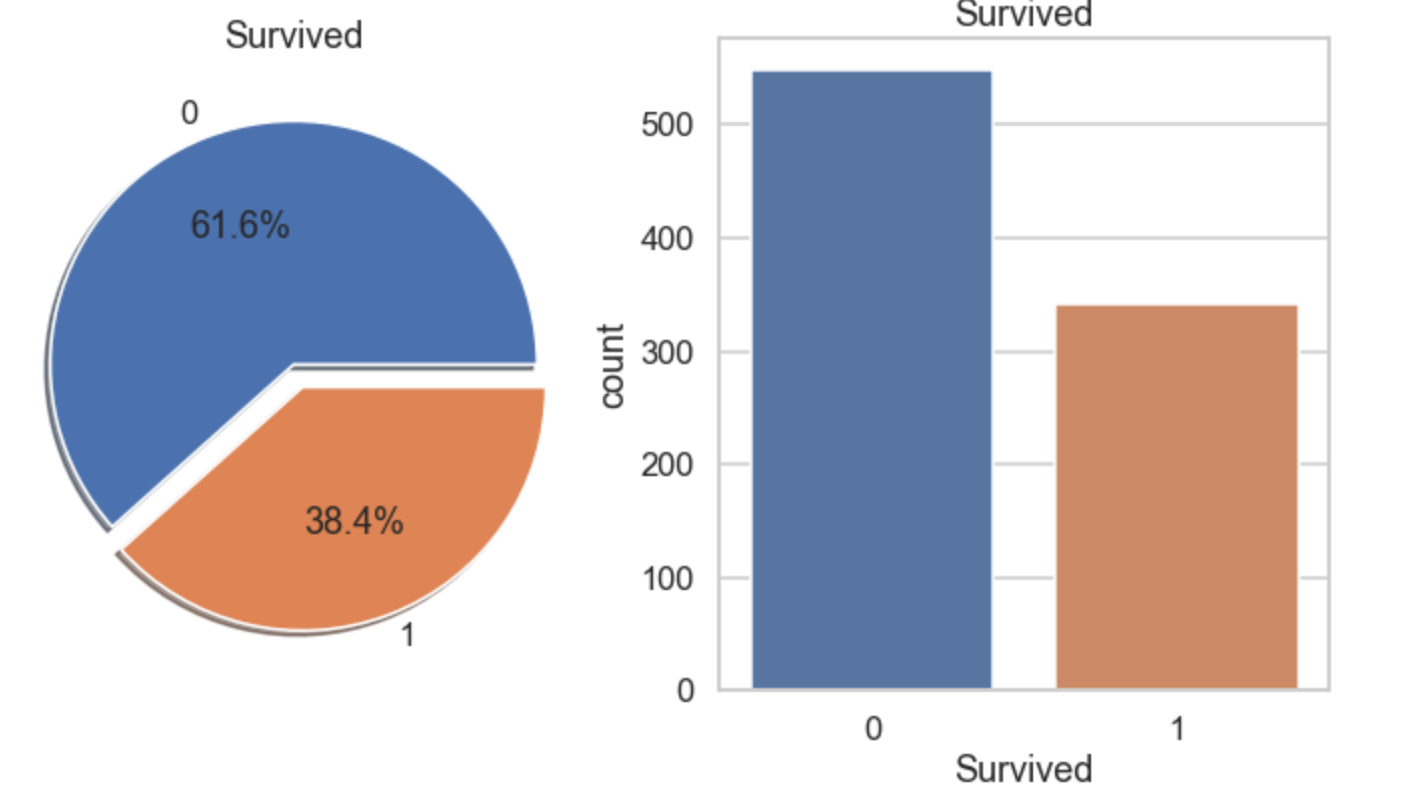


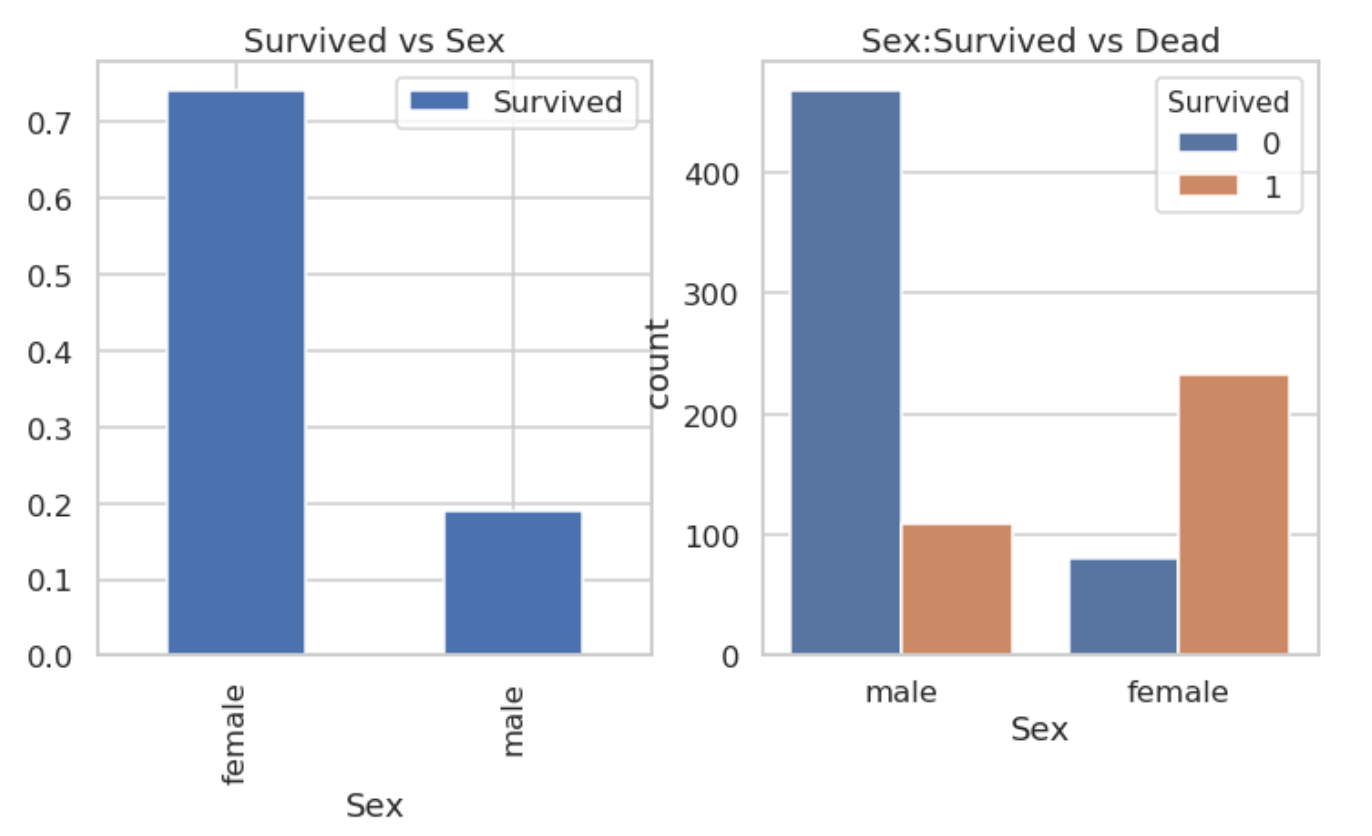

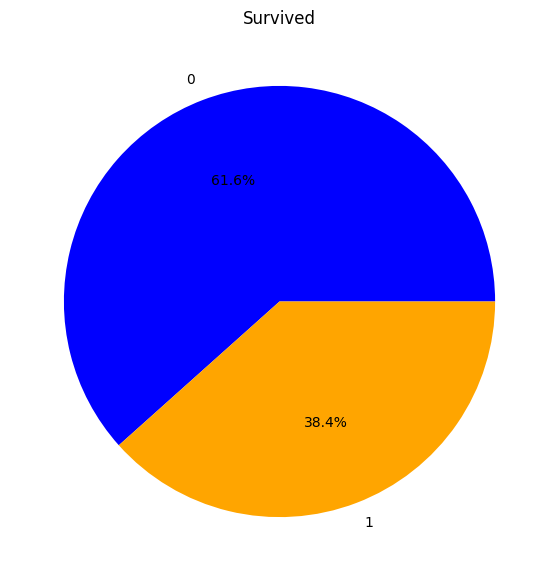

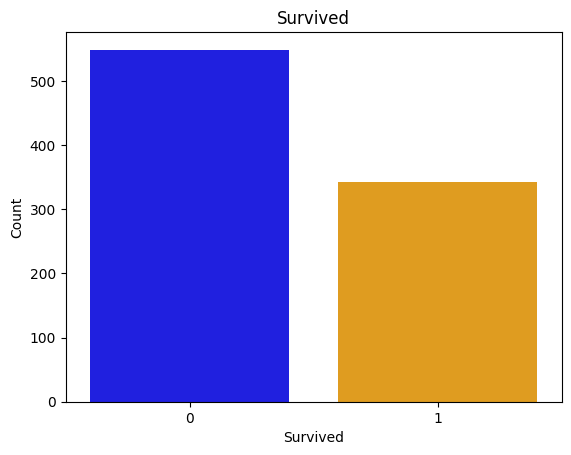

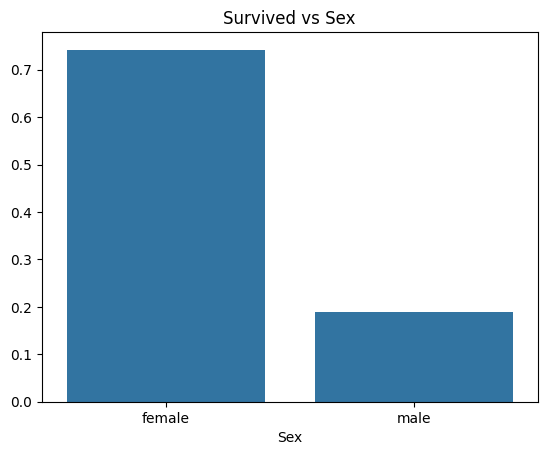

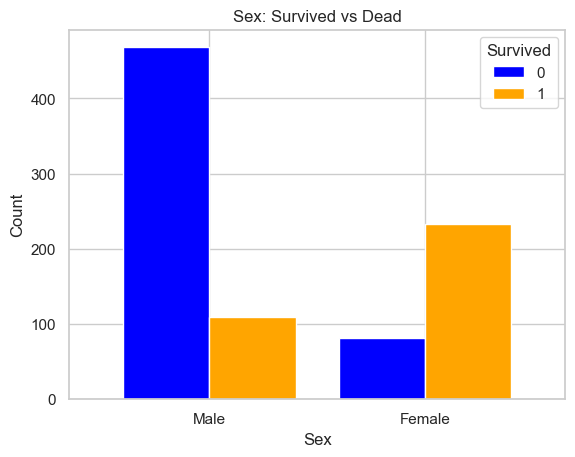

In [3]:
survival_counts = dataset['Survived'].value_counts()
plt.figure(figsize = (7, 7))
survival_counts.plot(kind = 'pie', autopct = '%1.1f%%', startangle = 0, labels = ['0', '1'], colors = ['blue', 'orange'])
plt.title('Survived')
plt.ylabel('')
plt.show()

sns.countplot(data = dataset, x = 'Survived', hue = 'Survived', palette = {0: 'blue', 1: 'orange'}, legend = False)
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survived')
plt.show()

sns.barplot(x = survival_rate.index, y = survival_rate.values / 100)
plt.xlabel('Sex')
plt.ylabel('')
plt.title('Survived vs Sex')
plt.show()

survival_counts = dataset.groupby(['Sex', 'Survived']).size().unstack(fill_value = 0)
survival_counts = survival_counts.loc[['male', 'female']]
sns.set(style = "whitegrid")
ax = survival_counts.plot(kind = 'bar', stacked = False, color = ['blue', 'orange'], width = 0.8)
plt.title('Sex: Survived vs Dead')
plt.xlabel('Sex')
plt.ylabel('Count')
ax.set_xticklabels(['Male', 'Female'], rotation = 0)
ax.set_xticks([0, 1])
ax.set_xticks([0.5, 1.5], minor = True)
plt.show()

Прокоментуйте побудовані графіки

Більшість людей загинули. Серед виживших жінок значно більше.

**Задача 3:** Скільки пропущених значень в датасеті по кожній із змінних? 

In [4]:
print(dataset.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


**Задача 4:** Назвіть найпопулярніше **жіноче** ім'я на кораблі. 

In [5]:
def extract_first_name(name):
    if '(' in name:
        return name.split('(')[1].split(')')[0].split()[0]
    else:
        return name.split(',')[1].split('.')[1].split()[0]
    
dataset['FirstName'] = dataset['Name'].apply(extract_first_name)
females = dataset[dataset['Sex'] == 'female']
name_counts = females['FirstName'].value_counts()

most_popular_female_name = name_counts.idxmax()
most_popular_count = name_counts.max()

print(f"The most popular female name is '{most_popular_female_name}' with {most_popular_count} occurrences.")

The most popular female name is 'Anna' with 15 occurrences.


**Задача 5:** Назвіть найпопулярніше **чоловіче** ім'я на кораблі. 

In [6]:
males = dataset[dataset['Sex'] == 'male']
name_counts = males['FirstName'].value_counts()

most_popular_male_name = name_counts.idxmax()
most_popular_count = name_counts.max()

print(f"The most popular male name is '{most_popular_male_name}' with {most_popular_count} occurrences.")

The most popular male name is 'William' with 35 occurrences.


**Задача 6:** Побудуйте діаграми співвідношення загиблих та виживших за інформацією про те, квитки якого класу були у пасажирів.
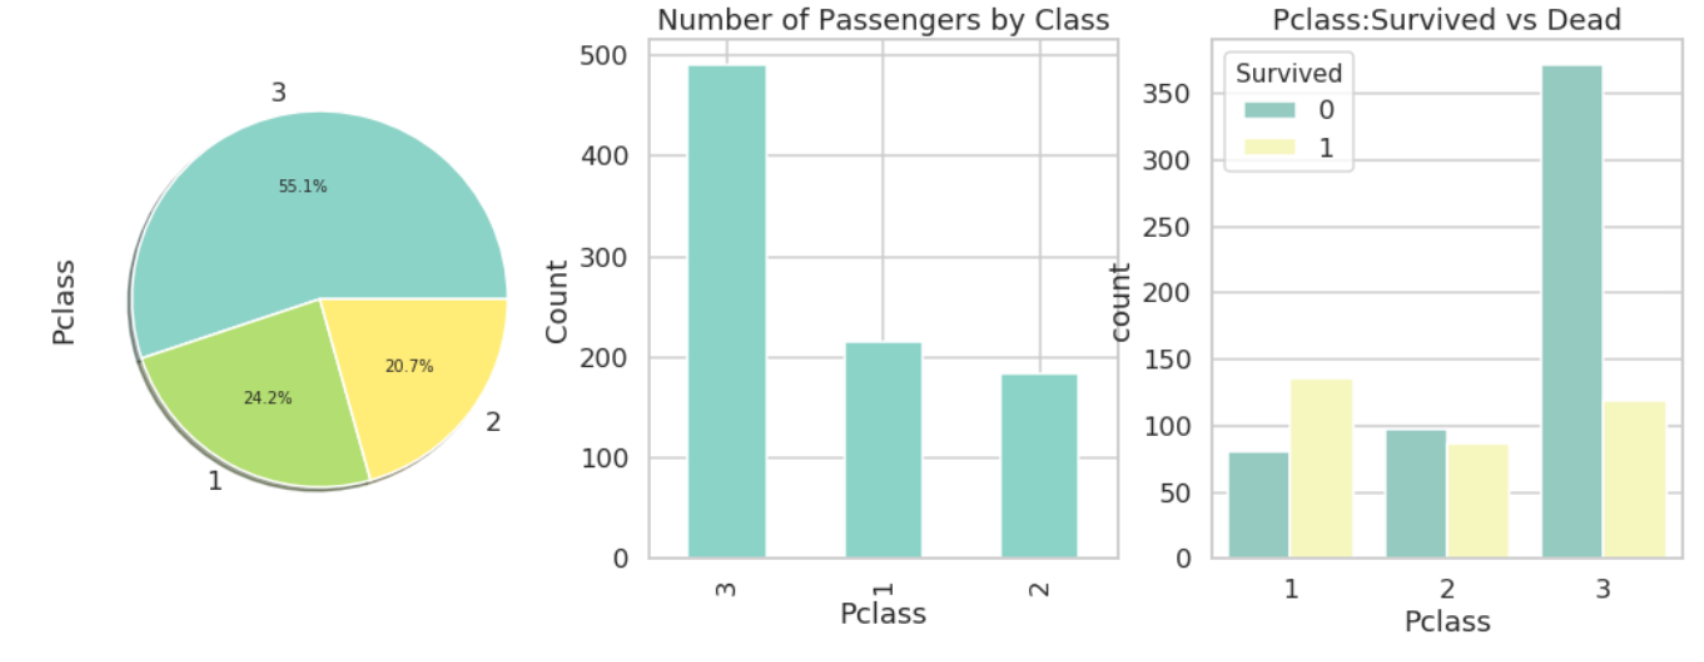

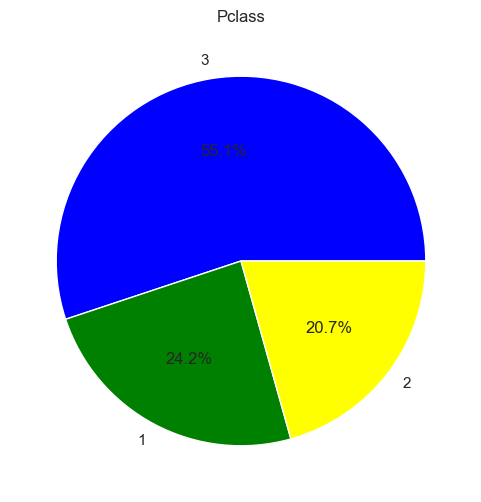

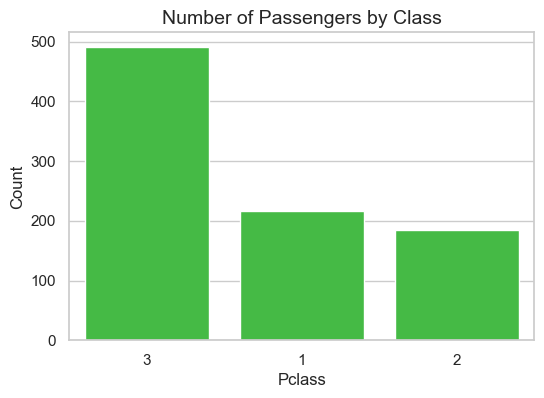

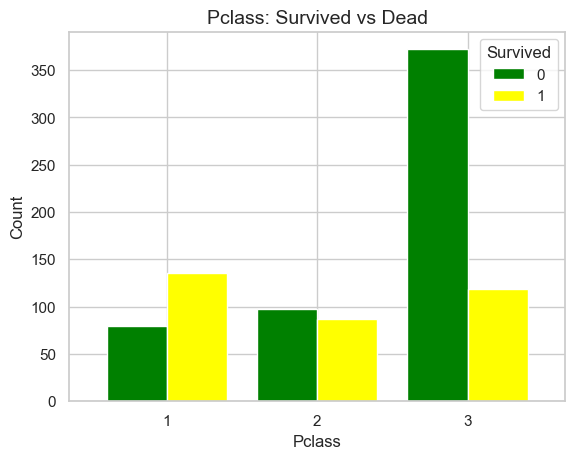

In [7]:
class_counts = dataset['Pclass'].value_counts().sort_values(ascending = False)

colors = {1: 'green', 2: 'yellow', 3: 'blue'}
plt.figure(figsize = (6, 6))
plt.pie(class_counts, labels = class_counts.index, colors = [colors[i] for i in class_counts.index], autopct = '%1.1f%%')
plt.title('Pclass')
plt.show()

plt.figure(figsize = (6, 4))
sns.countplot(x = 'Pclass', hue = 'Pclass', data = dataset, order = class_counts.index, palette = ['#32CD32'] * 3, legend = False)
plt.title('Number of Passengers by Class', fontsize = 14)
plt.xlabel('Pclass', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.show()

survival_counts_pclass = dataset.groupby(['Pclass', 'Survived']).size().unstack(fill_value = 0)
ax = survival_counts_pclass.plot(kind = 'bar', stacked = False, color = ['green', 'yellow'], width = 0.8)
plt.title('Pclass: Survived vs Dead', fontsize = 14)
plt.xlabel('Pclass', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['1', '2', '3'], rotation = 0)
plt.show()

Прокоментуйте побудовані графіки

Основна маса пасажирів належить до третього класу. Серед них же найбільша кількість загиблих. Найбільше вижило і найменше загибло пасажирів першого класу.

**Задача 7:** Побудуйте наступні графіки та опишіть, що власне на них відображається.  
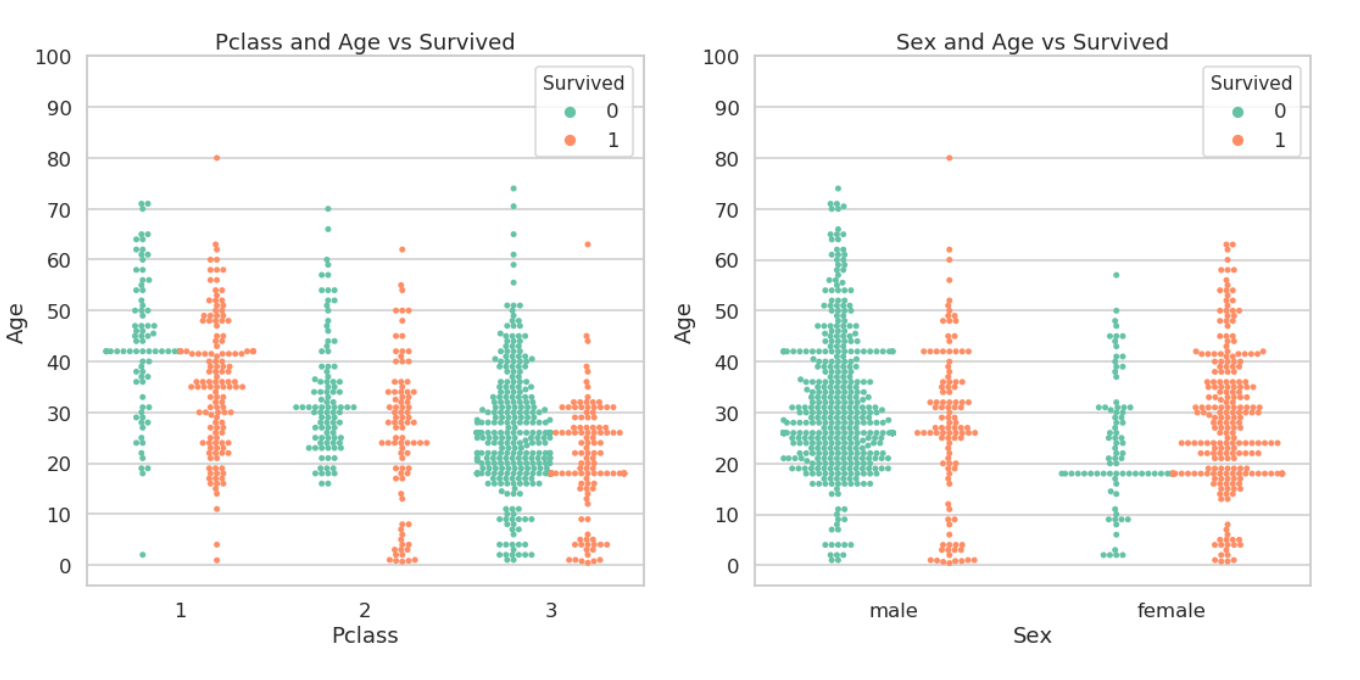![image.png](attachment:51486806-bd5d-4ae3-b95a-548aebf83de2.png)

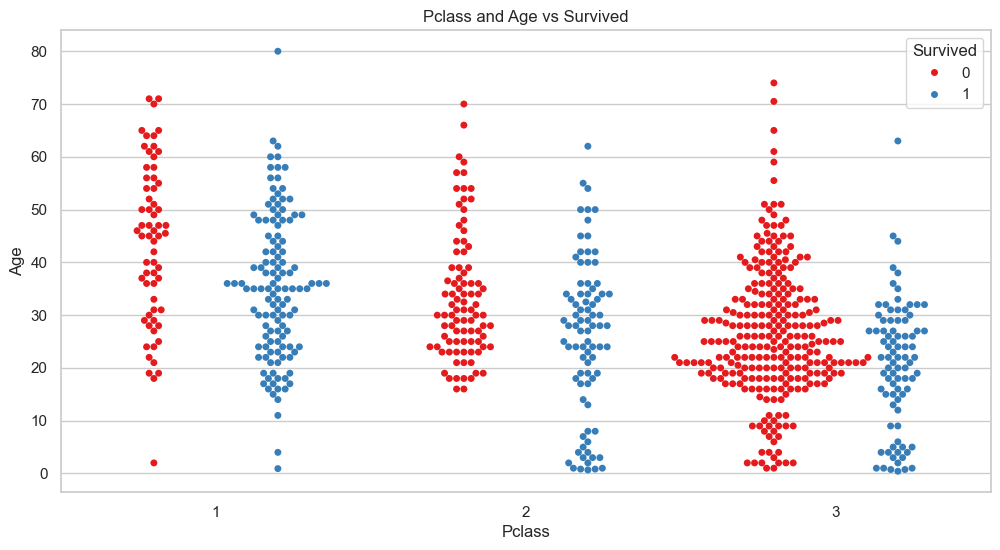

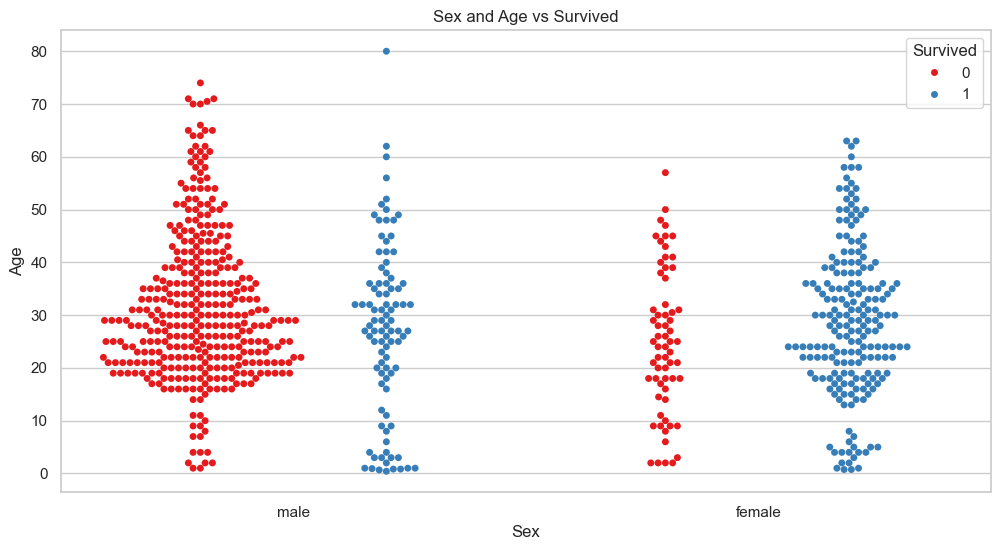

In [8]:
plt.figure(figsize = (12, 6))
sns.swarmplot(x = 'Pclass', y = 'Age', hue = 'Survived', data = dataset, dodge = True, palette = 'Set1')
plt.title('Pclass and Age vs Survived')
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.legend(title = 'Survived', loc = 'upper right')

plt.figure(figsize = (12, 6))
sns.swarmplot(x = 'Sex', y = 'Age', hue = 'Survived', data = dataset, dodge = True, palette = 'Set1')
plt.title('Sex and Age vs Survived')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.legend(title = 'Survived', loc = 'upper right')
plt.show()

Прокоментуйте побудовані графіки

Графіки в сукупності з попередніми підтверджують, що пасажири третього класу мали найменше шансів вижити, а пасажири першого класу - найбільше. Досить високий процент виживших серед дітей. Основна маса загиблих - чоловіки середнього віку. 

**Задача 8** Побудуйте наступні діаграми розподілів:  

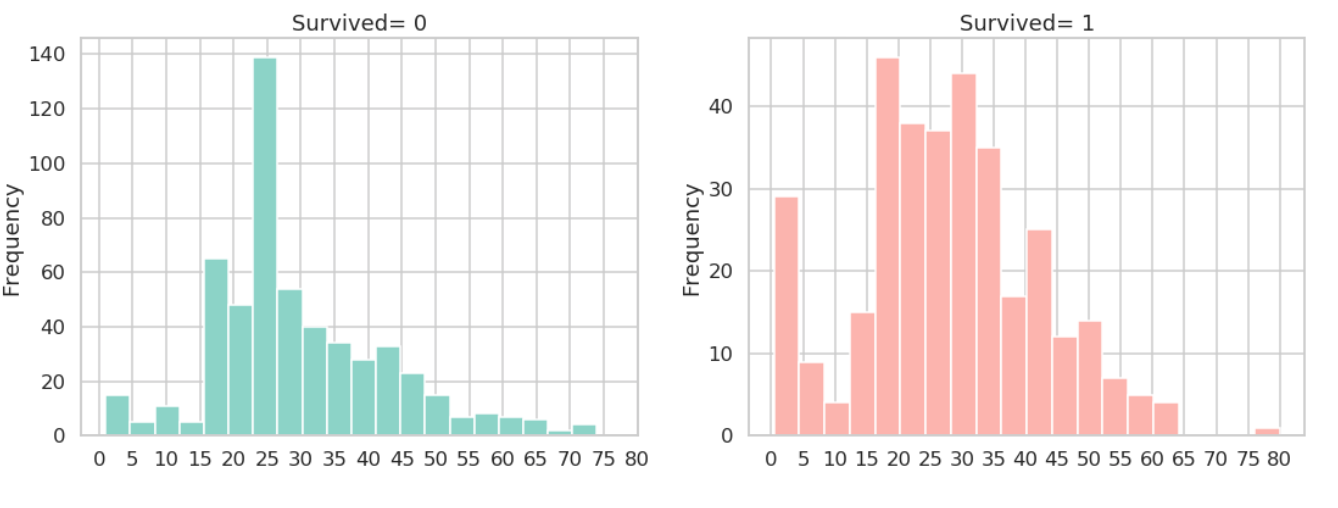



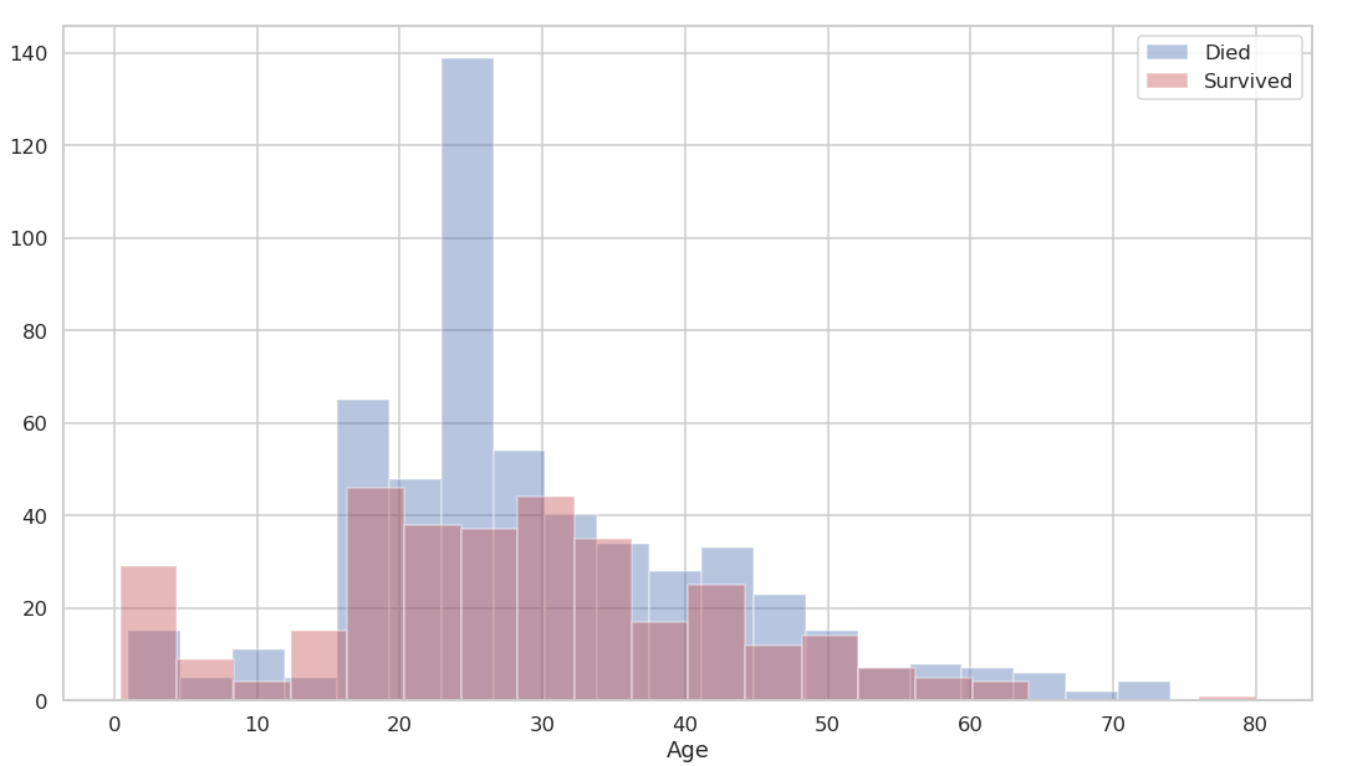

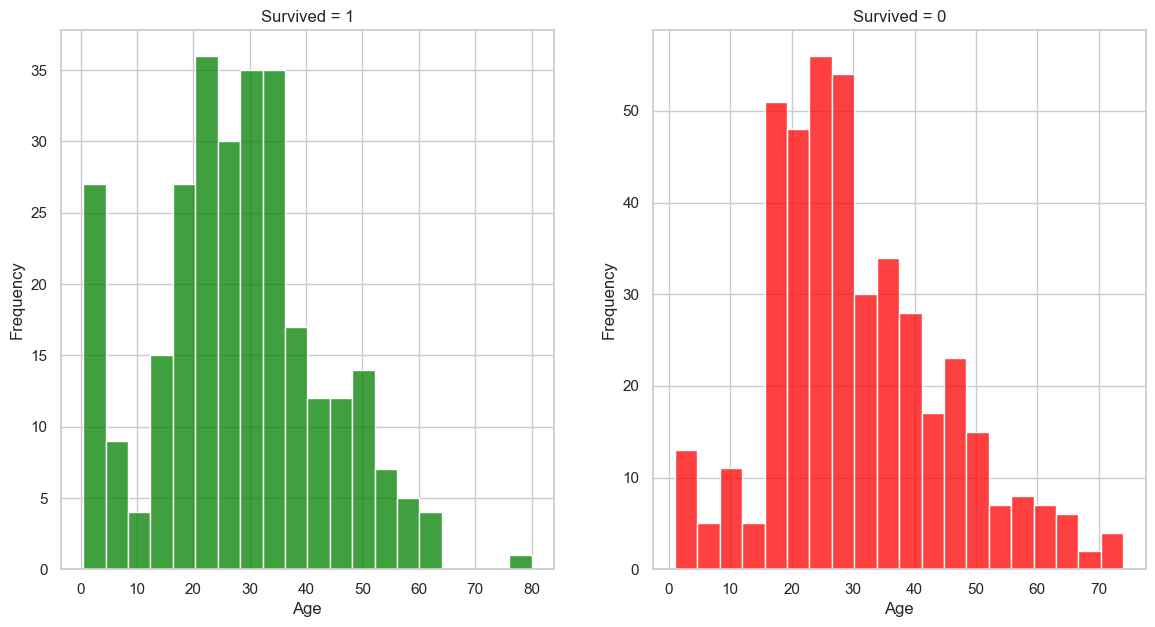

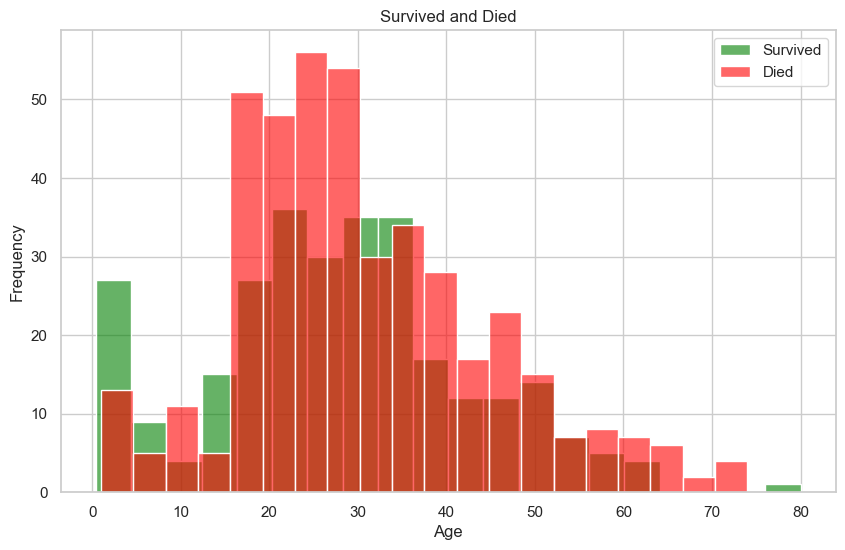

In [9]:
survived = dataset[dataset['Survived'] == 1]
died = dataset[dataset['Survived'] == 0]

plt.figure(figsize = (14, 7))
plt.subplot(1, 2, 2)
sns.histplot(died['Age'].dropna(), kde = False, color = 'red', bins = 20)
plt.title('Survived = 0')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 2, 1)
sns.histplot(survived['Age'].dropna(), kde = False, color = 'green', bins = 20)
plt.title('Survived = 1')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.figure(figsize=(10, 6))
sns.histplot(survived['Age'].dropna(), kde = False, color = 'green', label = 'Survived', alpha = 0.6, bins = 20)
sns.histplot(died['Age'].dropna(), kde = False, color = 'red', label = 'Died', alpha = 0.6, bins = 20)
plt.title('Survived and Died')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Що можна сказати, про розподіли змінних згідно до цих гістограм? Чи достатньо лише побудованих візуалізацій для висновків щодо розподілів та статистичних оцінок?


Розподіл нагадує нормальний, але самих лише візуалізацій недостатньо для побудови висновків.

**Задача 9:** Побудуйте наступні діаграми та проведіть аналітику шансів на виживання серед пасажирів:  
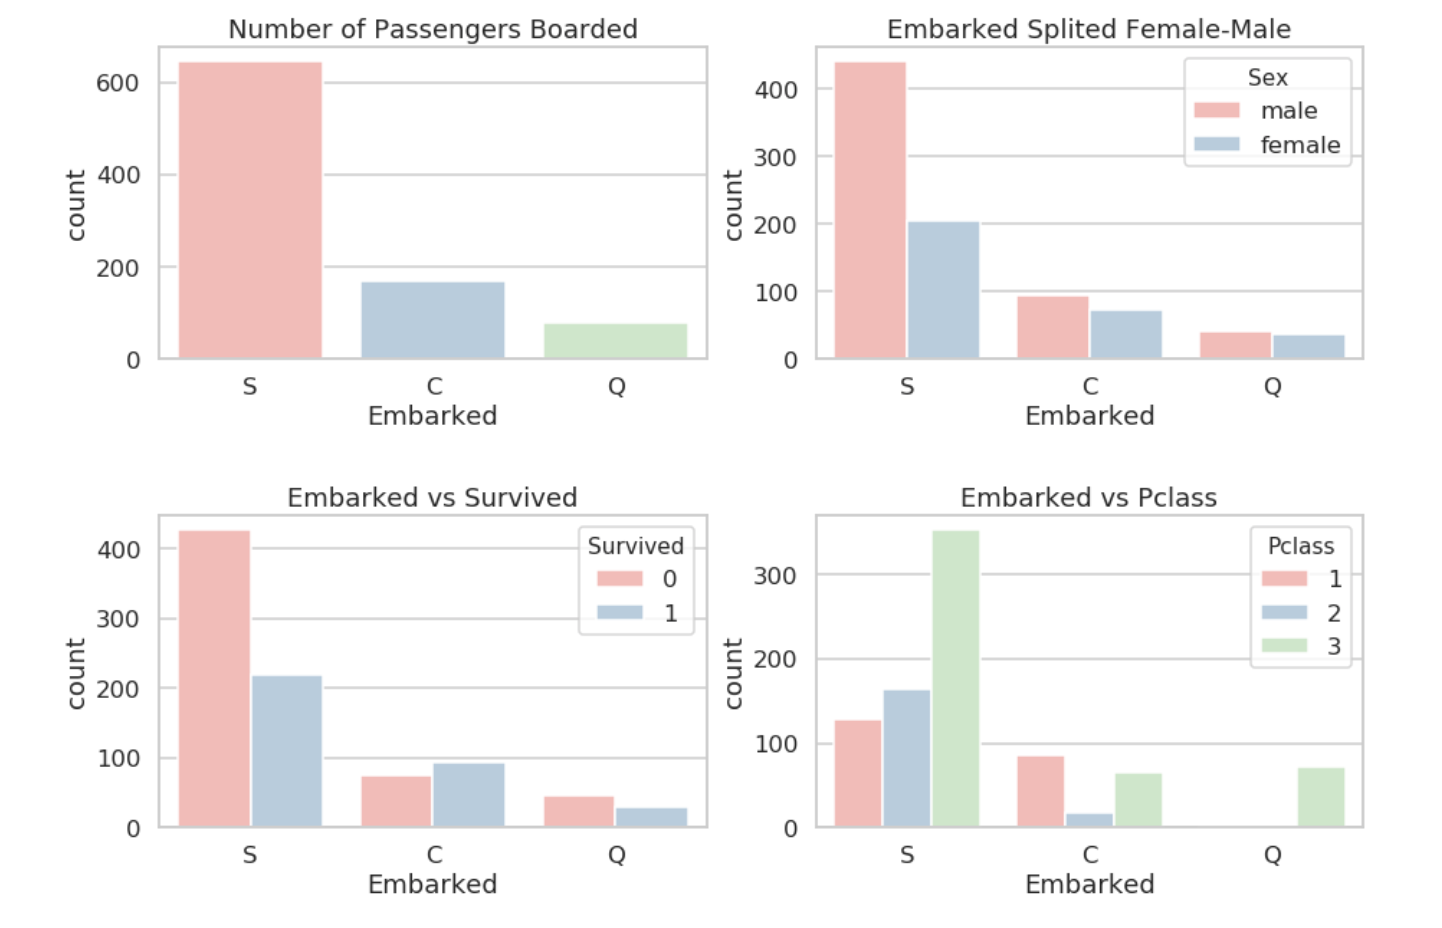

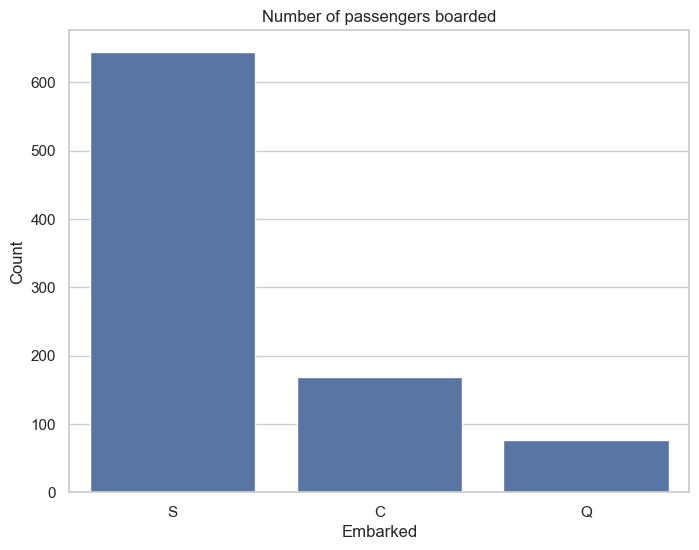

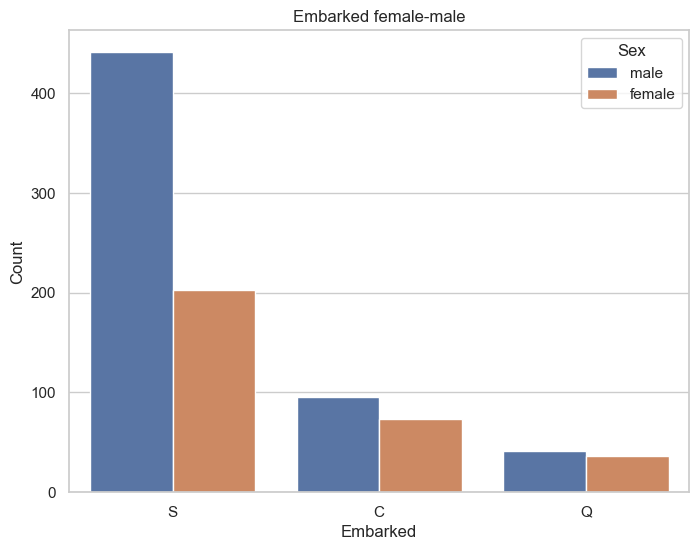

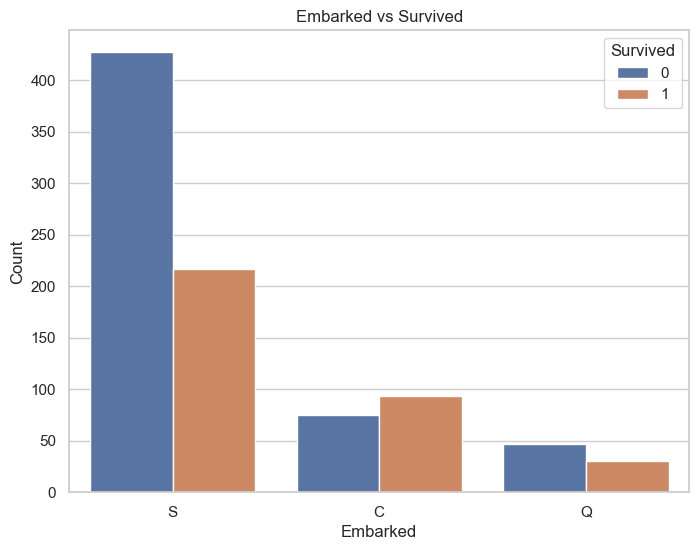

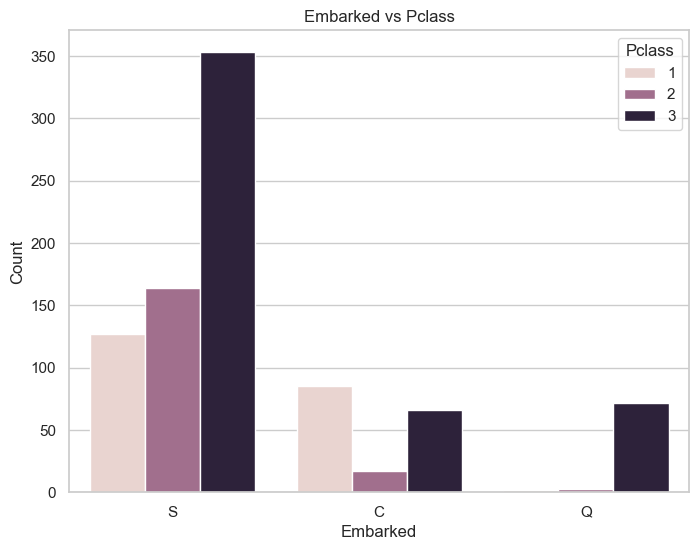

In [10]:
plt.figure(figsize = (8, 6))
sns.countplot(data = dataset, x = 'Embarked')
plt.title('Number of passengers boarded')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.show()

plt.figure(figsize = (8, 6))
sns.countplot(data = dataset, x = 'Embarked', hue = 'Sex')
plt.title('Embarked female-male')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.show()

plt.figure(figsize = (8, 6))
sns.countplot(data = dataset, x = 'Embarked', hue = 'Survived')
plt.title('Embarked vs Survived')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.show()

plt.figure(figsize = (8, 6))
sns.countplot(data = dataset, x = 'Embarked', hue = 'Pclass')
plt.title('Embarked vs Pclass')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.show()

***Завдача 10** Побудуйте діаграму розподілу ```вартості квитка``` відповідно до якого классу належіть пасажир.

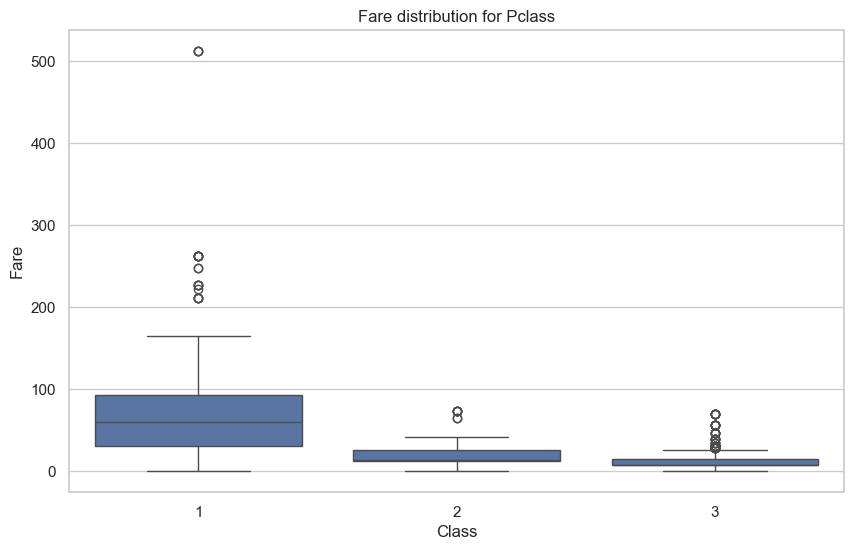

In [11]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'Pclass', y = 'Fare', data = dataset)
plt.title('Fare distribution for Pclass')
plt.xlabel('Class')
plt.ylabel('Fare')
plt.show()

Прокоментуйте побудовані графіки

9: Саутгемптон (S) - найбільш завантажений порт. В портах Шербург (C) та Куїнстаун (Q) спостерігається майже рівне співвідношення чоловіків і жінок. Серед пасажирів з порту Саутгемптон найвищий рівень загиблих, що, ймовірно, пов'язано з великою кількістю пасажирів третього класу. Велика частка пасажирів першого класу відправлялася через порт Шербург (С), що пояснює кращі шанси на виживання серед цієї групи.
10: Серед квитків першого класу спорстерігається найбільший діапазон значень, а також велика кількість аномалій.